In [1]:
import gym
import numpy as np
import itertools
import json
import pandas as pd


from ray.rllib.models.tf.tf_modelv2 import TFModelV2
from ray.rllib.algorithms.dqn.distributional_q_tf_model import DistributionalQTFModel
from ray.rllib.algorithms import ppo
from ray.rllib.models.tf.misc import normc_initializer
from ray.rllib.models import ModelCatalog
from ray.rllib.algorithms.dqn import DQN

import tensorflow as tf

from towerofhanoienv import TowerOfHanoiEnv


In [2]:
checkpoint_root = "tmp/dqn/towerofhanoi"

In [3]:
agent = DQN(env=TowerOfHanoiEnv, config={
    "env_config": {"num_disks": 1},
    #"num_workers": 2,
    "train_batch_size": 16,
    "lr": 0.00005,

})

results = []
episode_data = []
episode_json = []

for n in range(30):
    result = agent.train()
    results.append(result)

    episode = {
        "n": n,
        "episode_reward_min": result["episode_reward_min"],
        "episode_reward_mean": result["episode_reward_mean"],
        "episode_reward_max": result["episode_reward_max"],
        "episode_len_mean": result["episode_len_mean"],
    }

    episode_data.append(episode)
    episode_json.append(json.dumps(episode))
    file_name = agent.save(checkpoint_root)

    print(f'{n:3d}: Min/Mean/Max reward/episode length mean: {result["episode_reward_min"]:8.4f}/{result["episode_reward_mean"]:8.4f}/{result["episode_reward_max"]:8.4f}/{result["episode_len_mean"]:8.4f}. Checkpoint saved to {file_name}')

Could not instantiate TBXLogger: No module named 'tensorboardX'.
2023-03-07 22:21:04,462	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 
2023-03-07 22:21:07,729	WARNING env.py:147 -- Your env doesn't have a .spec.max_episode_steps attribute. This is fine if you have set 'horizon' in your config dictionary, or `soft_horizon`. However, if you haven't, 'horizon' will default to infinity, and your environment will not be reset.
2023-03-07 22:21:07,731	WARNING env.py:159 -- Your env reset() method appears to take 'seed' or 'return_info' arguments. Note that these are not yet supported in RLlib. Seeding will take place using 'env.seed()' and the info dict will not be returned from reset.
/Users/sophialawal/opt/anaconda3/envs/rllib/lib/python3.9/site-packages/gym/spaces/multi_discrete.py:168: UserWarning: WARN: Getting the length of a multi-dimensional MultiDiscrete space.
  logger.warn(
2023-03-07 22:21:10,921	INFO trainable.py:164 -- Trainable.setu

  0: Min/Mean/Max reward/episode length mean: -16.5000/ -3.8246/ -1.0000/  5.8012. Checkpoint saved to tmp/dqn/towerofhanoi/checkpoint_000001
  1: Min/Mean/Max reward/episode length mean: -16.0000/ -3.5500/ -1.0000/  5.3053. Checkpoint saved to tmp/dqn/towerofhanoi/checkpoint_000002
  2: Min/Mean/Max reward/episode length mean: -10.5000/ -2.0495/ -1.0000/  2.7445. Checkpoint saved to tmp/dqn/towerofhanoi/checkpoint_000003
  3: Min/Mean/Max reward/episode length mean:  -9.5000/ -1.7349/ -1.0000/  2.2394. Checkpoint saved to tmp/dqn/towerofhanoi/checkpoint_000004
  4: Min/Mean/Max reward/episode length mean:  -4.5000/ -1.4476/ -1.0000/  1.7430. Checkpoint saved to tmp/dqn/towerofhanoi/checkpoint_000005
  5: Min/Mean/Max reward/episode length mean:  -6.5000/ -1.3603/ -1.0000/  1.6187. Checkpoint saved to tmp/dqn/towerofhanoi/checkpoint_000006
  6: Min/Mean/Max reward/episode length mean:  -4.5000/ -1.2790/ -1.0000/  1.4507. Checkpoint saved to tmp/dqn/towerofhanoi/checkpoint_000007
  7: M

In [4]:
#%pip install matplotlib

<Axes: >

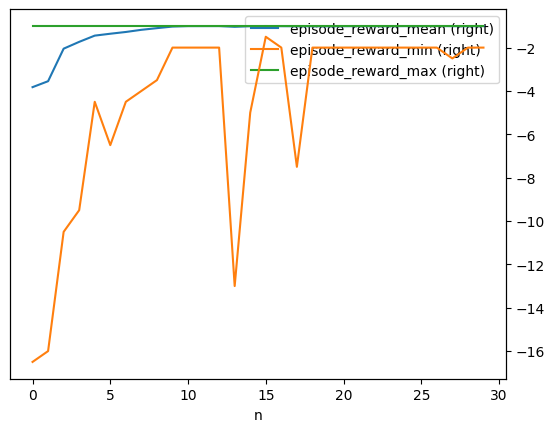

In [5]:
df = pd.DataFrame(data=episode_data)
df.plot(x="n", y=["episode_reward_mean", "episode_reward_min", "episode_reward_max"], secondary_y=True)

In [6]:
agent = ppo.PPO(env=TowerOfHanoiEnv, config={
    "env_config": {"num_disks": 2},
    "num_workers": 2,
    #"train_batch_size": 16,
    "lr": 0.00005,
    "model": {
        "fcnet_hiddens": [128, 256],
        "fcnet_activation": "relu",
    },

})

results = []
episode_data = []
episode_json = []

for n in range(30):
    result = agent.train()
    results.append(result)

    episode = {
        "n": n,
        "episode_reward_min": result["episode_reward_min"],
        "episode_reward_mean": result["episode_reward_mean"],
        "episode_reward_max": result["episode_reward_max"],
        "episode_len_mean": result["episode_len_mean"],
    }

    episode_data.append(episode)
    episode_json.append(json.dumps(episode))
    file_name = agent.save(checkpoint_root)

    print(f'{n:3d}: Min/Mean/Max reward: {result["episode_reward_min"]:8.4f}/{result["episode_reward_mean"]:8.4f}/{result["episode_reward_max"]:8.4f}. Checkpoint saved to {file_name}')

(RolloutWorker pid=2944) 2023-03-07 22:24:22,569	WARNING env.py:147 -- Your env doesn't have a .spec.max_episode_steps attribute. This is fine if you have set 'horizon' in your config dictionary, or `soft_horizon`. However, if you haven't, 'horizon' will default to infinity, and your environment will not be reset.
(RolloutWorker pid=2944) 2023-03-07 22:24:22,569	WARNING env.py:159 -- Your env reset() method appears to take 'seed' or 'return_info' arguments. Note that these are not yet supported in RLlib. Seeding will take place using 'env.seed()' and the info dict will not be returned from reset.
(RolloutWorker pid=2945) /Users/sophialawal/opt/anaconda3/envs/rllib/lib/python3.9/site-packages/gym/spaces/multi_discrete.py:168: UserWarning: WARN: Getting the length of a multi-dimensional MultiDiscrete space.
(RolloutWorker pid=2945)   logger.warn(
(RolloutWorker pid=2944) /Users/sophialawal/opt/anaconda3/envs/rllib/lib/python3.9/site-packages/gym/spaces/multi_discrete.py:168: UserWarning:

  0: Min/Mean/Max reward: -134.5000/-31.6278/ -4.5000. Checkpoint saved to tmp/dqn/towerofhanoi/checkpoint_000001
  1: Min/Mean/Max reward: -71.5000/-18.7226/ -3.0000. Checkpoint saved to tmp/dqn/towerofhanoi/checkpoint_000002
  2: Min/Mean/Max reward: -39.5000/-11.5412/ -3.0000. Checkpoint saved to tmp/dqn/towerofhanoi/checkpoint_000003
  3: Min/Mean/Max reward: -43.5000/ -7.6284/ -3.0000. Checkpoint saved to tmp/dqn/towerofhanoi/checkpoint_000004
  4: Min/Mean/Max reward: -20.5000/ -5.6630/ -3.0000. Checkpoint saved to tmp/dqn/towerofhanoi/checkpoint_000005
  5: Min/Mean/Max reward: -16.5000/ -4.5577/ -3.0000. Checkpoint saved to tmp/dqn/towerofhanoi/checkpoint_000006
  6: Min/Mean/Max reward: -13.0000/ -3.7458/ -3.0000. Checkpoint saved to tmp/dqn/towerofhanoi/checkpoint_000007
  7: Min/Mean/Max reward:  -7.5000/ -3.4778/ -3.0000. Checkpoint saved to tmp/dqn/towerofhanoi/checkpoint_000008
  8: Min/Mean/Max reward:  -7.5000/ -3.3021/ -3.0000. Checkpoint saved to tmp/dqn/towerofhanoi/

<Axes: >

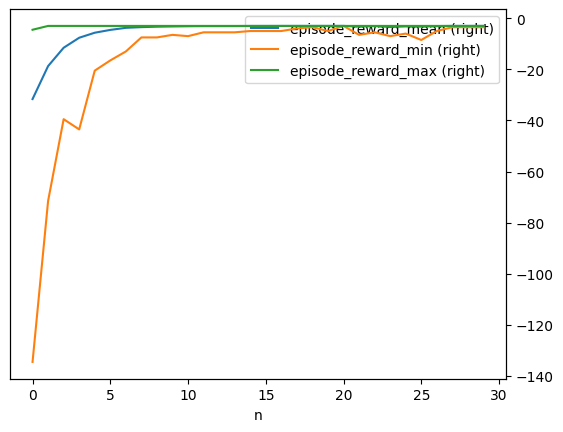

In [7]:
df = pd.DataFrame(data=episode_data)
df.plot(x="n", y=["episode_reward_mean", "episode_reward_min", "episode_reward_max"], secondary_y=True)

In [8]:
agent =DQN(env=TowerOfHanoiEnv, config={
    #"model": {
    #    "custom_preprocessor": MyPreprocessor,
        # other model configuration parameters
    #}
    # other algorithm configuration parameters
    "env_config": {"num_disks": 1},
    #"num_workers": 2,
    "train_batch_size": 16,
    "lr": 0.00005,

})

results = []
episode_data = []
episode_json = []

for n in range(30):
    result = agent.train()
    results.append(result)

    episode = {
        "n": n,
        "episode_reward_min": result["episode_reward_min"],
        "episode_reward_mean": result["episode_reward_mean"],
        "episode_reward_max": result["episode_reward_max"],
        "episode_len_mean": result["episode_len_mean"],
    }

    episode_data.append(episode)
    episode_json.append(json.dumps(episode))
    file_name = agent.save(checkpoint_root)

    print(f'{n:3d}: Min/Mean/Max reward: {result["episode_reward_min"]:8.4f}/{result["episode_reward_mean"]:8.4f}/{result["episode_reward_max"]:8.4f}. Checkpoint saved to {file_name}')

/Users/sophialawal/opt/anaconda3/envs/rllib/lib/python3.9/site-packages/gym/spaces/multi_discrete.py:168: UserWarning: WARN: Getting the length of a multi-dimensional MultiDiscrete space.
  logger.warn(
2023-03-07 22:27:23,444	WARNING util.py:66 -- Install gputil for GPU system monitoring.


  0: Min/Mean/Max reward: -21.5000/ -4.0155/ -1.0000. Checkpoint saved to tmp/dqn/towerofhanoi/checkpoint_000001
  1: Min/Mean/Max reward: -16.5000/ -3.1076/ -1.0000. Checkpoint saved to tmp/dqn/towerofhanoi/checkpoint_000002
  2: Min/Mean/Max reward:  -9.0000/ -2.0623/ -1.0000. Checkpoint saved to tmp/dqn/towerofhanoi/checkpoint_000003
  3: Min/Mean/Max reward:  -6.5000/ -1.7834/ -1.0000. Checkpoint saved to tmp/dqn/towerofhanoi/checkpoint_000004
  4: Min/Mean/Max reward:  -7.5000/ -1.5448/ -1.0000. Checkpoint saved to tmp/dqn/towerofhanoi/checkpoint_000005
  5: Min/Mean/Max reward:  -4.5000/ -1.4151/ -1.0000. Checkpoint saved to tmp/dqn/towerofhanoi/checkpoint_000006
  6: Min/Mean/Max reward:  -5.0000/ -1.2536/ -1.0000. Checkpoint saved to tmp/dqn/towerofhanoi/checkpoint_000007
  7: Min/Mean/Max reward:  -3.5000/ -1.1705/ -1.0000. Checkpoint saved to tmp/dqn/towerofhanoi/checkpoint_000008
  8: Min/Mean/Max reward:  -3.0000/ -1.1070/ -1.0000. Checkpoint saved to tmp/dqn/towerofhanoi/c

<Axes: >

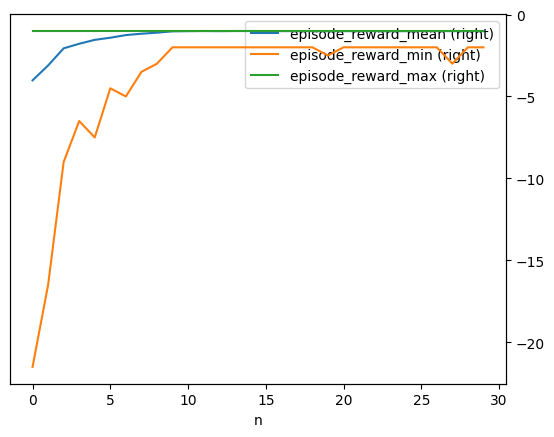

In [9]:
df = pd.DataFrame(data=episode_data)
df.plot(x="n", y=["episode_reward_mean", "episode_reward_min", "episode_reward_max"], secondary_y=True)